In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
# 导入数据
df = pd.read_csv('./mouse_viral_study.csv')
df.head(10)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
5,2.158224,2.745451,1
6,8.172223,7.328995,0
7,8.719652,6.228618,0
8,6.779079,6.630667,0
9,3.043633,4.642650,1


该数据集模拟了一项医学研究，对感染病毒的小白鼠使用不同剂量的两种药物，观察两周后小白鼠是否治愈  
第 1、2 列表示两种不同的药物，第 3 类表示是否治愈(0:治愈，1:未治愈)

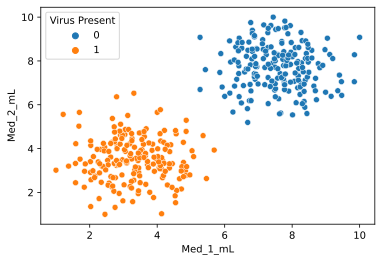

In [3]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df);

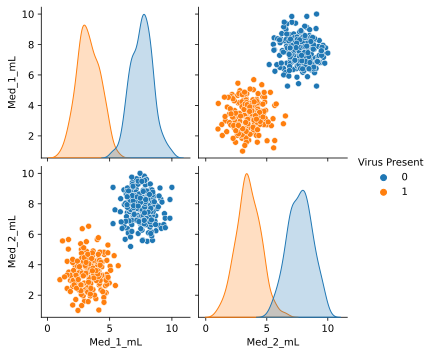

In [4]:
sns.pairplot(df,hue='Virus Present');

## 训练

In [5]:
# 绘制图像
# 定义绘制 SVM 边界方法
def plot_svm_boundary(model, X, y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='coolwarm')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

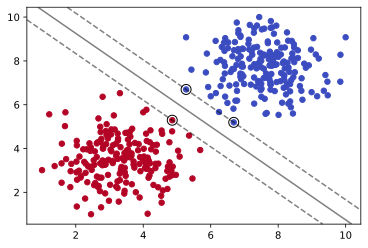

In [6]:
#SVC: Supprt Vector Classifier支持向量分类器
from sklearn.svm import SVC

#准备数据
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

#定义模型
model = SVC(kernel='linear', C=1000)

#训练模型
model.fit(X, y)
plot_svm_boundary(model,X,y)

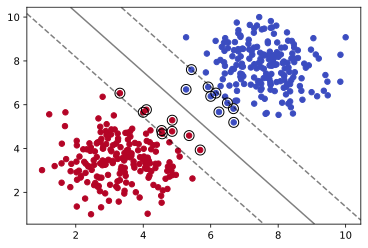

In [7]:
# 调整参数 C
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### 非线性 核技巧

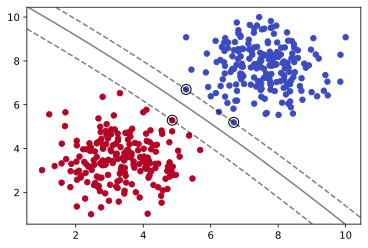

In [8]:
# 多项式核
model = SVC(kernel='poly', C=0.05,degree=5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

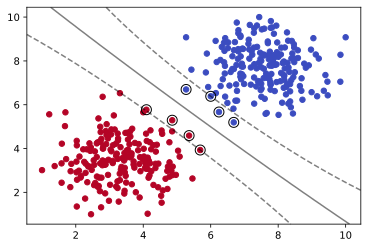

In [9]:
# 高斯 RBF 内核
model = SVC(kernel='rbf', C=10,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## 调参技巧：网格搜索(暴力)

In [10]:
from sklearn.model_selection import GridSearchCV
svm = SVC() # model
param_grid = {'C':[0.01,0.1,1],'kernel':['rbf','poly','linear','sigmoid'],'gamma':[0.01,0.1,1]}
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
print("grid.best_params_ = ",grid.best_params_,", grid.best_score_ =" ,grid.best_score_)

grid.best_params_ =  {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'} , grid.best_score_ = 1.0
